# [Blog home](http://rajeshrinet.github.io/blog)
$$
$$

# Central limit theorem (CLT)

Lets begin by looking at distributions of random numbers.

In [2]:
%matplotlib inline
from __future__ import division      
import numpy as np
import scipy.stats as stats     # for pdfs 
import matplotlib.pyplot as plt

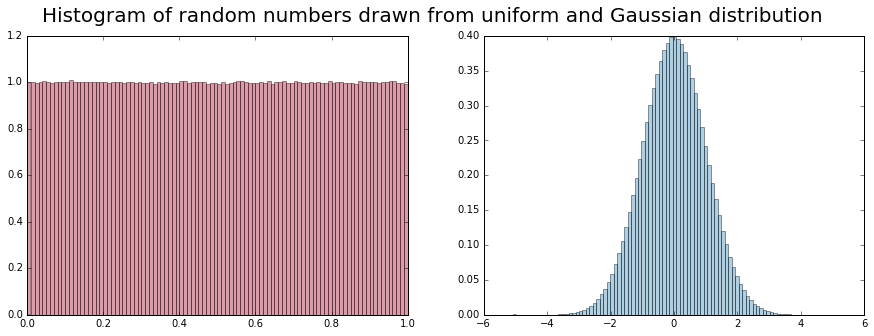

In [2]:
# hist a set of random numbers, Gaussian distributed
import numpy as np
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

N = 10000000
x = np.random.random(N)
ax1.hist(x, 100, normed=True, color='#A60628', alpha=0.4);

x = np.random.randn(N)
ax2.hist(x ,100, normed=True, color='#348ABD', alpha=0.4);

plt.suptitle("Histogram of random numbers drawn from uniform and Gaussian distribution",fontsize=20);

## Samples
To know about a population we take recourse to sampling.


* Samples are group of observation drwan from a bigger population.
* All this effort is to know about a bigger population based on sample.

### Gaussian distribution
$P(x;\mu,\sigma)=\displaystyle \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\displaystyle \left( -\frac{(x-\mu)^2}{2 \sigma^2} \right) },
\hspace{1in} x \in [-\infty;\infty]$

#### mean=$\mu$, variance=$\sigma^2$
#### We will see that this distribution plays a central role in the central limit theorem!

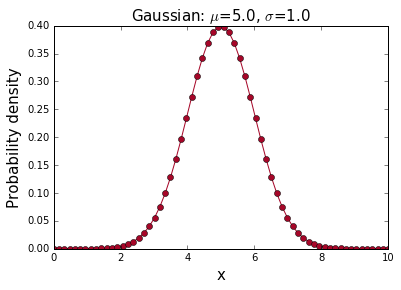

In [3]:
u = 5 # mean
s = 1 # standard deviation
x = np.linspace(0,10, 64)
y = (1/(np.sqrt(2*np.pi*s*s)))*np.exp(-(((x-u)**2)/(2*s*s)))

plt.plot(x,y,'o-', color='#A60628')
plt.title('Gaussian: $\mu$=%.1f, $\sigma$=%.1f' % (u,s),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15);

### Binomial distribution
$$
P(n;N,p)=\displaystyle \left(
\frac{N!}{n!(N-n)!}
\right)
p^n (1-p)^{N-n}
$$

#### mean=$Np$, variance=$Np(1-p)$


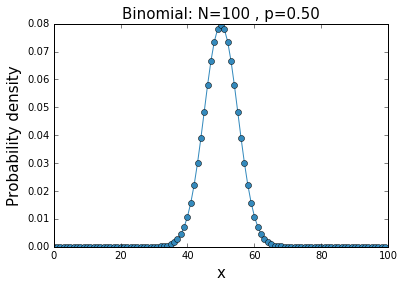

In [4]:
N = 100
p = 0.5
n = np.arange(0, 100)
y = stats.binom.pmf(n, N, p)


plt.plot(n,y,'o-', color='#348ABD')
plt.title('Binomial: N=%i , p=%.2f' % (N,p),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15);

### Poisson distribution
$$
P(n;\mu)=\frac{\mu^n e^{-\mu}}{n!}
$$

#### mean=$\mu$, variance=$\mu$


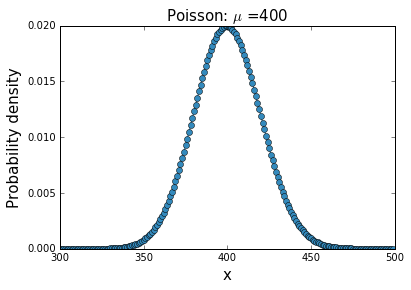

In [5]:
u=400
n=range(300, 500)
y=stats.poisson.pmf(n,u)

plt.plot(n,y,'o-', color='#348ABD')
plt.title('Poisson: $\mu$ =%i' % u,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15);

## Central limit theorem

Let  $\{X_n\}$ be a sequence of independent and identically distributed (iid) random variables of finite mean $\mu$ and standard deviation $\sigma$. 

> Central Limit Theorem (CLT) says that the sum of iid random variables will always converge to a Gaussian distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$.



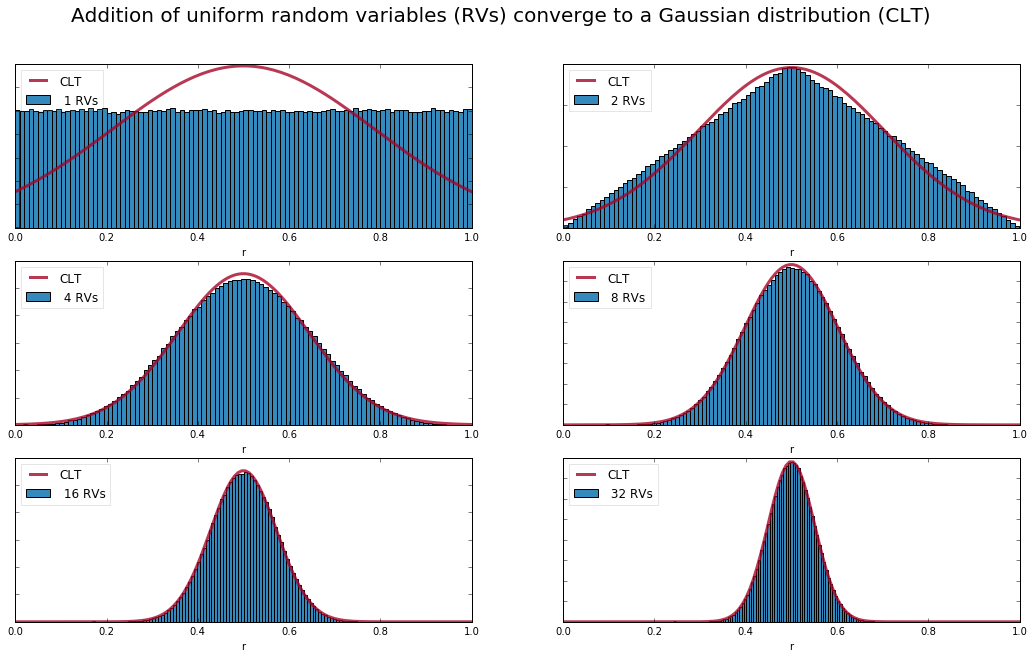

In [6]:
f = plt.figure(figsize=(18, 10))
 
def plotHist(nr, N, n_, mean, var0, x0):
    ''' plots the RVs'''
    x = np.zeros((N))
    sp = f.add_subplot(3, 2, n_ )
    
    for i in range(N):    
        for j in range(nr):
            x[i] += np.random.random() 
        x[i] *= 1/nr
    plt.hist(x, 100, normed=True, color='#348ABD', label=" %d RVs"%(nr));
    plt.setp(sp.get_yticklabels(), visible=False)
    
    variance = var0/nr                     
    fac = 1/np.sqrt(2*np.pi*variance)
    dist = fac*np.exp(-(x0-mean)**2/(2*variance))
    plt.plot(x0,dist,color='#A60628',linewidth=3,label='CLT',alpha=0.8)
    plt.xlabel('r')
    plt.xlim([0, 1])
    leg = plt.legend(loc="upper left")
    leg.get_frame().set_alpha(0.1)

    
N = 1000000   # number of samples taken
nr = ([1, 2, 4, 8, 16, 32])

mean, var0 = 0.5, 1.0/12  # mean and variance of uniform distribution in range 0, 1
x0 = np.linspace(0, 1, 128)

for i in range(np.size(nr)):
    plotHist(nr[i], N, i+1, mean, var0, x0)

plt.suptitle("Addition of uniform random variables (RVs) converge to a Gaussian distribution (CLT)",fontsize=20);

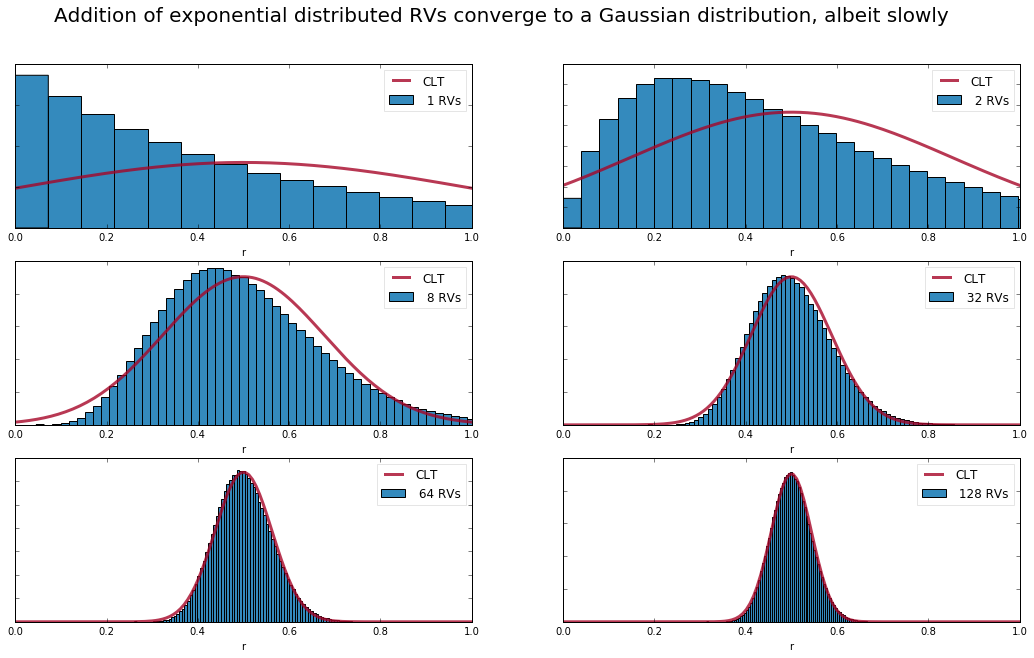

In [7]:
f = plt.figure(figsize=(18, 10))
 
def plotHist(nr, N, n_, mean, var0, x0):
    ''' plots the RVs'''
    x = np.zeros((N))
    sp = f.add_subplot(3, 2, n_ )
    
    for i in range(N):    
        for j in range(nr):
            x[i] += np.random.exponential(mean) 
        x[i] *= 1/nr
    plt.hist(x, 100, normed=True, color='#348ABD', label=" %d RVs"%(nr));
    plt.setp(sp.get_yticklabels(), visible=False)
    
    variance = var0/nr                     
    fac = 1/np.sqrt(2*np.pi*variance)
    dist = fac*np.exp(-(x0-mean)**2/(2*variance))
    plt.plot(x0,dist,color='#A60628',linewidth=3,label='CLT',alpha=0.8)
    plt.xlabel('r')
    plt.xlim([0, 1])
    leg = plt.legend(loc="upper right")
    leg.get_frame().set_alpha(0.1)

    
N = 1000000   # number of samples taken
nr = ([1, 2, 8, 32, 64, 128])

mean, var0 = 0.5, 0.5*0.5  # mean and variance of exponential distribution
x0 = np.linspace(0, 1, 128)

for i in range(np.size(nr)):
    plotHist(nr[i], N, i+1, mean, var0, x0)

plt.suptitle("Addition of exponential distributed RVs converge to a Gaussian distribution, albeit slowly",fontsize=20);

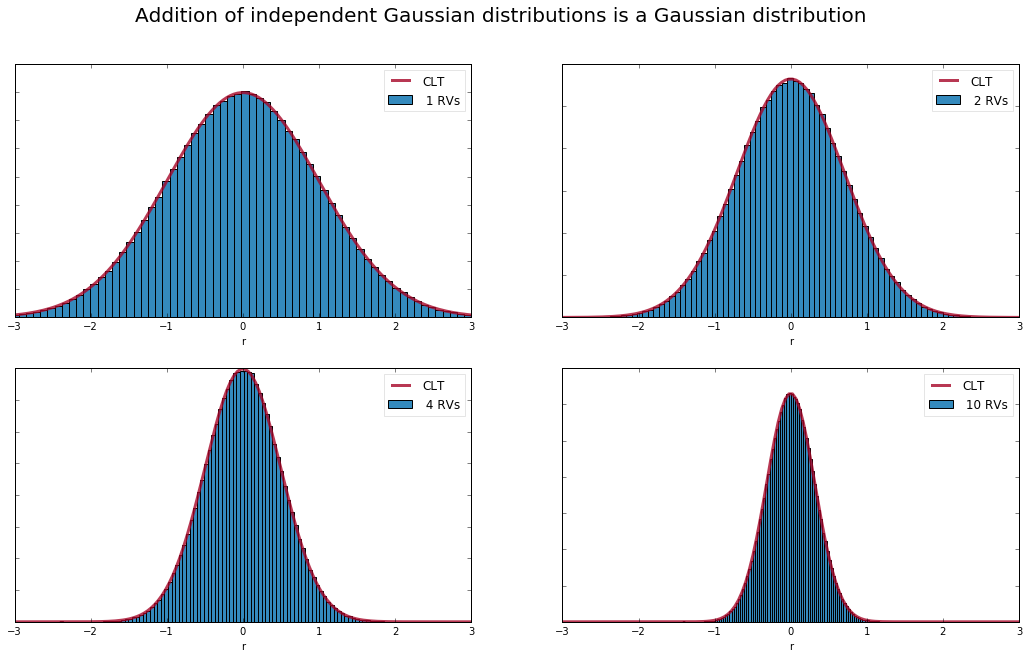

In [16]:
f = plt.figure(figsize=(18, 10))
 
def plotHist(nr, N, n_, mean, var0, x0):
    ''' plots the RVs'''
    x = np.zeros((N))
    sp = f.add_subplot(2, 2, n_ )
    
    for i in range(N):    
        for j in range(nr):
            x[i] += np.random.randn() 
        x[i] *= 1/nr
    plt.hist(x, 100, normed=True, color='#348ABD', label=" %d RVs"%(nr));
    plt.setp(sp.get_yticklabels(), visible=False)
    
    variance = var0/nr                     
    fac = 1/np.sqrt(2*np.pi*variance)
    dist = fac*np.exp(-(x0-mean)**2/(2*variance))
    plt.plot(x0,dist,color='#A60628',linewidth=3,label='CLT',alpha=0.8)
    plt.xlabel('r')
    plt.xlim([-3, 3])
    leg = plt.legend(loc="upper right")
    leg.get_frame().set_alpha(0.1)

    
N = 1000000   # number of samples taken
nr = ([1, 2, 4, 10])

mean, var0 = 0, 1 # mean and variance of exponential distribution
x0 = np.linspace(-3, 3, 128)

for i in range(np.size(nr)):
    plotHist(nr[i], N, i+1, mean, var0, x0)

plt.suptitle("Addition of independent Gaussian distributions is a Gaussian distribution",fontsize=20);

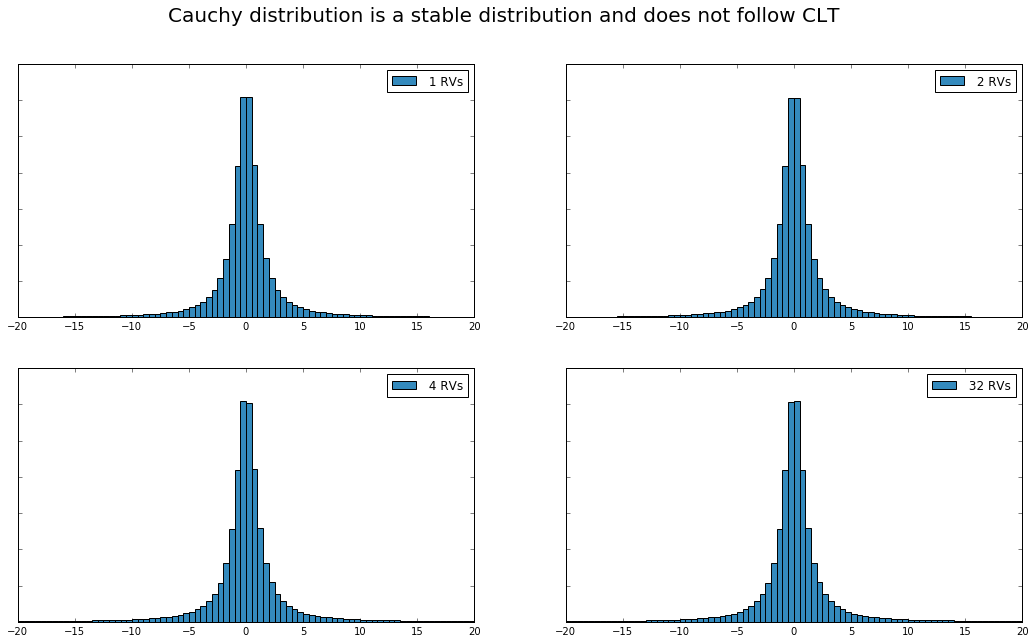

In [4]:
f = plt.figure(figsize=(18, 10))
 
def plotHist(nr, N, n_, mean, var0, x0):
    ''' plots the RVs'''
    x = np.zeros((N))
    sp = f.add_subplot(2, 2, n_)
    
    for i in range(N):    
        for j in range(nr):
            x[i] += np.random.standard_cauchy() 
        x[i] *= 1/nr
    x = x[(x>-25) & (x<25)]  # to get a proper plot
    plt.hist(x, 100, normed=True, color='#348ABD', label=" %d RVs"%(nr));
    
    plt.xlim([-20, 20])
    leg = plt.legend(loc="upper right")
    plt.setp(sp.get_yticklabels(), visible=False)

    
N = 1000000   # number of samples 
nr = ([1, 2, 4, 32])

mean, var0 = 0, 1  # mean and variance of exponential distribution
x0 = np.linspace(0, 1, 128)

for i in range(np.size(nr)):
    plotHist(nr[i], N, i+1, mean, var0, x0)

plt.suptitle("Cauchy distribution is a stable distribution and does not follow CLT",fontsize=20);

## Stable distributions

Both Cauchy and Gaussian are stable distributions, i.e., the sum of independent Cauchy and Gaussian distributions is Cauchy and Gaussian respectively. This can be shown explicitly from the evaluation of characteristic functions. The characteristic function of a probability distribution $P(x)$ is defined as

$$
{{\tilde{P}}}_{X}(k)=\langle \exp(ikX)\rangle
$$

Thus the characteristic function for the sum of independent random variables is the product of their characteristic functions. 

It is easy to show that both Cauchy and Gaussian distribution have characteristic function of the form 

$$
{{\tilde{P}}}_{X}(k)\approx \exp (-c k^{\alpha})
$$

Here $\alpha$ takes values 1 and 2 for Cauchy and Gaussian respectively and $c$ is a constant. Since, the product of these exponentials is also an exponential, the characteristic function for the sum independent random variables is same as the initial one.